In [24]:
!pip install scikit-surprise

Computing the cosine similarity matrix...
Done computing similarity matrix.
['Iced Americano (350 ML)', 'Aeropress', 'Add On Syrup (Add On Tiramisu Syrup)', 'Baked Vada Pav']
Top 3 recommended items for 21006: ['Madagascar Chocochip Frappe (350 ML)', 'Tartlets (Kacha Nimbu Tartlet)', 'South Indian Filter Kaapi (150 ML)']


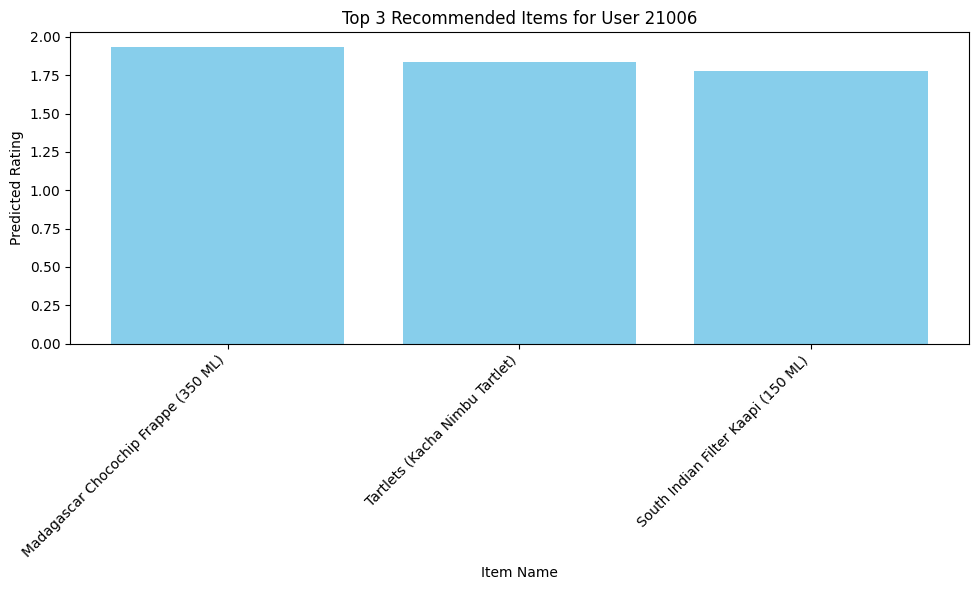

In [34]:
# Install Surprise library if you haven't already
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, KNNWithMeans
from surprise.model_selection import train_test_split
import pandas as pd

# Load your data into a pandas DataFrame
data = pd.read_csv("Data.csv")  # Replace "your_data.csv" with the path to your CSV file

# Define a Reader object to parse the dataframe
reader = Reader(rating_scale=(0, 10))

# Load the data into a Surprise dataset
# Assuming your data has columns in the order: 'Customer name', 'item name', 'quantity'
data_surprise = Dataset.load_from_df(data[['Invoice No.', 'Item Name', 'Qty.']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

# Use user-based collaborative filtering with kNN
sim_options = {'name': 'cosine', 'user_based': True}
algo = KNNWithMeans(sim_options=sim_options)

# Train the model
algo.fit(trainset)

# Get recommendations for a user (e.g., 'Customer name')
user_id = '21006'  # Replace 'User1' with the actual customer name
top_n = 3  # Number of recommendations to retrieve

# Get the list of items the user has already purchased
purchased_items = data[data['Invoice No.'] == user_id]['Item Name'].tolist()

# Remove duplicates
purchased_items = list(set(purchased_items))
print(purchased_items[:10])
# Get the list of items the user hasn't purchased yet
unpurchased_items = [item for item in data['Item Name'].unique() if item not in purchased_items]

# Generate predictions for unpurchased items
predictions = [algo.predict(user_id, item) for item in unpurchased_items]

# Sort the predictions by estimated rating in descending order
predictions.sort(key=lambda x: x.est, reverse=True)

# Get the top N recommended items
top_recommendations = [pred.iid for pred in predictions[:top_n]]

print(f"Top {top_n} recommended items for {user_id}: {top_recommendations}")

item_names = [pred.iid for pred in predictions[:top_n]]
predicted_ratings = [pred.est for pred in predictions[:top_n]]

plt.figure(figsize=(10, 6))
plt.bar(item_names, predicted_ratings, color='skyblue')
plt.xlabel('Item Name')
plt.ylabel('Predicted Rating')
plt.title(f'Top {top_n} Recommended Items for User {user_id}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()